### Ensembling is a ml technique in which we train multiple models and check their score and combine their accuracy at one place
### The idea is that by combining the strengths of multiple models, the ensemble can achieve better performance than any single model alone.
### 2 typee, Bagging(Bootstrap Aggregating) and Boosting
### 3 basic ensembling techniques are Max voting, Averaging amd Weighted avaerage
### 4 Advanced ensembling techniques are Satcking, Blending, Bagging and Boosting.
### Algos based on Bagging and Boosting are Bagging algo==> Bagging meta-estimator and Random forest and Boosting algos==> AdaBoost, GBM, XGBM, Light GBM and CatBoost

# Max Voting
### used for classification problems in which multiple models are used to make predictions for each data point.
### the prediction by each model is consodered as a 'vote'. the predictions which we get from the majority of the models are used as the final prediction.

# Average and weighted average:
### Take an average of predictions from all the models and use it to make the final prediction.

# Max Voting

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [7]:
# load the dataset
x,y=make_moons(n_samples=1000, noise=0.2)

# make dictionary
d={"x1": x[:,0], "x2": x[:,1], "y":y}

# dataframe
d_set=pd.DataFrame(d)

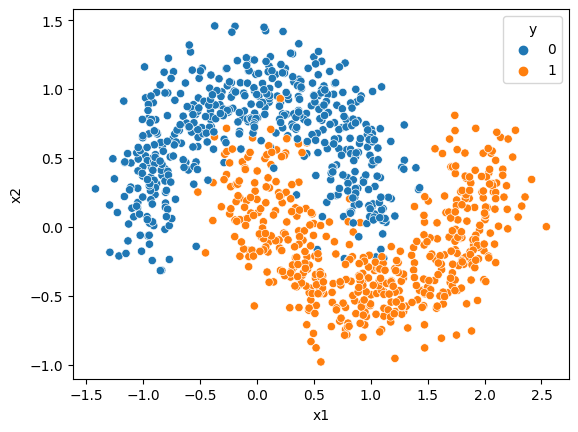

In [8]:
# make graph
sns.scatterplot(x=d_set['x1'], y=d_set['x2'], data=d_set, hue='y')
plt.show()

### now we will apply different models

In [11]:
# separate the x and y values
x=d_set.iloc[:,:-1]
y=d_set['y']

# split the data
xtrain, xtest, ytrain ,ytest=train_test_split(x,y, test_size=0.2)

In [12]:
# we will apply following models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [13]:
# through dtree
dt=DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

# check scores
dt.score(xtrain, ytrain)*100, dt.score(xtest, ytest)*100

(100.0, 93.5)

In [14]:
# svc
sv=SVC()
sv.fit(xtrain, ytrain)

# scores
sv.score(xtrain, ytrain)*100, sv.score(xtest, ytest)*100

(97.0, 96.0)

In [15]:
nb=GaussianNB()
nb.fit(xtrain, ytrain)

# scores
nb.score(xtrain, ytrain)*100, nb.score(xtest, ytest)*100

(87.375, 81.5)

### ensembling

In [22]:
from sklearn.ensemble import VotingClassifier

# make list of models 
l=[("dt1", DecisionTreeClassifier()), ("sv1", SVC()), ("nb1", GaussianNB())]

# model
vc=VotingClassifier(l)
vc.fit(xtrain, ytrain)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('nb1', GaussianNB())])

In [23]:
# scores
vc.score(xtrain, ytrain)*100, vc.score(xtest, ytest)*100

(97.75, 94.0)

### result: above is the combined accuracy of all these three models

In [24]:
# now to check the values based on voting
d={'dt':dt.predict(xtest), 'svm':sv.predict(xtest), 'gnb':nb.predict(xtest), "VC": vc.predict(xtest)}
df=pd.DataFrame(d)
df

,dt,svm,gnb,VC
0,0,0,0,0
1,0,0,0,0
2,1,1,0,1
3,1,1,1,1
4,0,0,1,0
...,...,...,...,...
195,0,0,0,0
196,0,0,0,0
197,1,1,1,1
198,0,0,0,0


### result: from above values at 2 and 199 the VC is 1 because of the max vote count